## Predictive Model – Regularization in Linear regression and its python implementation:

In this blog, we will try to learn Regularization in Linear regression and its python implementation


To understand the implementation cycle, please see the following blog:
#### https://datasciencewithabhi.blogspot.com/2020/03/life-cycle-of-machine-learningml-project.html

** Please note that as part of this blog, we are not going for data collection or model deployment as part of implementation. Data is already available. In later blogs, we will cover some of the model selection techniques, deployment etc., as separate topics. Each of the areas like EDA, model selection, parameter hyper tuning etc. is vast and has many ways to do it. As part of different blogs, we will cover the different methods in each of the above mentioned area. Goal is to get the idea of model/intuition and implementation first and then more exploration in each of the topic can be done later. 


### Regularization : 


As we have understood in one of the previous blogs that the model used for prediction should have a good tradeoff between the bias and variance . The case, where model is too complex and have high variance , is the case of overfitting i.e. model is trying too hard to fit all the data points(including noise) of training data. By noise we mean the data points that don’t really represent the true properties of your data, but random chance. Learning such data points, makes your model more flexible, at the risk of overfitting.

__How to address Overfitting problem ?__

 One way could be to reduce the number of features or variables in a model. While this would increase the degrees of freedom of the model, there would be a loss of information due to the discarding of features. Thus the model would not have the benefit of all the information that would have been available otherwise. Regularization could be used in such cases that would allow us to keep all the features while working on reducing the magnitude or amplitude of the features available. Regularization also works to reduce the impact of higher-order polynomials in the model. Thus in a way, it provides a trade-off between accuracy and generalizability of a model.


__Regularization__ is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

Simple linear regression is given as:


For better model creation, we have objective to reduce the loss function. One of such loss function is MSE (Mean squared error) donated by :
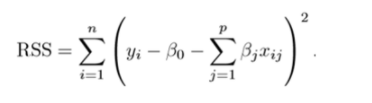

If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero. Lets understand the different type of __Regularization__ techniques. These are :
1. LASSO (least absolute shrinkae and selection operator) regression
2. Ridge Regression
3. Elastic Net Regression



__LASSO (least absolute shrinkage and selection operator) regression (L1 form)__

LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

<img src="L1.PNG" width="300">


#### Ridge Regression (L2 Form)
Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j ^ 2| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

<img src="ridge.PNG" width="300">

This value of lambda can be anything and should be calculated by cross validation as to what suits the model.

Let’s consider $\beta_1$ and $\beta_2$ be coefficients of a linear regression and λ = 1:

For Lasso, $\beta_1$ + $\beta_2$ <= s  

For Ridge, $\beta_1^2$ + $\beta_2^2$  <= s  

Where s is the maximum value the equations can achieve
. The above two equation is also known as __Constraint functions__
If we plot both the above equations, we get the following graph:
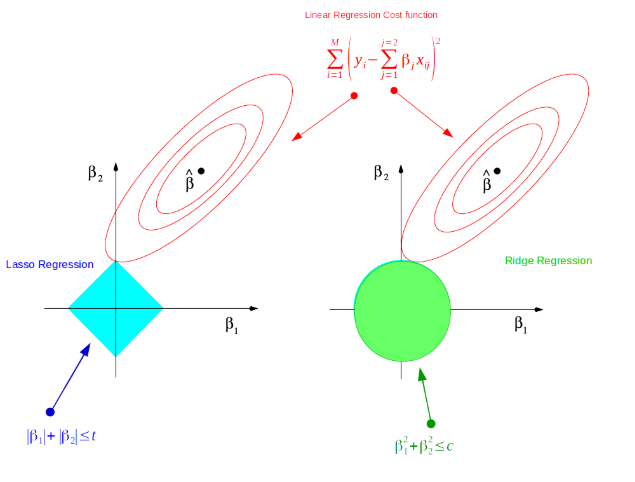


The above image shows the constraint functions(green areas), for lasso(left) and ridge regression(right), along with contours for RSS(red ellipse). Points on the ellipse share the value of RSS. For a very large value of s, the green regions will contain the center of the ellipse, making coefficient estimates of both regression techniques, equal to the least squares estimates. But, this is not the case in the above image. In this case, the lasso and ridge regression coefficient estimates are given by the ﬁrst point at which an ellipse contacts the constraint region. __Since ridge regression has a circular constraint with no sharp points, this intersection will not generally occur on an axis, and so the ridge regression coeﬃcient estimates will be exclusively non-zero. However, the lasso constraint has corners at each of the axes, and so the ellipse will often intersect the constraint region at an axis. When this occurs, one of the coeﬃcients will equal zero.__ In higher dimensions(where parameters are much more than 2), many of the coeﬃcient estimates may equal zero simultaneously.

__This sheds light on the obvious disadvantage of ridge regression, which is model interpretability.__ It will shrink the coefficients for least important predictors, very close to zero. But it will never make them exactly zero. In other words, the final model will include all predictors. However, in the case of the lasso, the L1 penalty has the eﬀect of forcing some of the coeﬃcient estimates to be exactly equal to zero when the tuning parameter λ is suﬃciently large. Therefore, the lasso method also performs variable selection and is said to yield sparse models.

__When to Chose L1 or L2 Regularization ?__

L1 is usually preferred when we are interested in fitting a linear model with fewer variables. L1 seems to encourage the coefficients of the variables to go towards zero because of the shape of the constraint which is an absolute value.
L1 is also useful when considering a categorical variable with many levels. L1 would make many of variable/feature weights go towards zero and thus leaving only the important ones in the model. This also helps in feature selection. L2 does not encourage convergence towards zero but is likely to make them closer to zero and prevent overfitting. Ridge or L2 is useful when there are a large number of variables with relatively smaller data samples, like in the case of genomic data.  

##### Elastic Net

According to the Hands-on Machine Learning book, elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio α. 

<img src="elasticNet.PNG" width="300">
where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).  

Let's see a python implementation of the Regularization Techniques. 

#### Problem Statement
This about predicting the 'Chance of Admission' of a student in a US university  based on different independent parameter like GRE_score , Toefl_score etc . 

Data can be found at following location:
https://github.com/abhishek-knowledge-incubator/DataScience/blob/master/LinearRegression/Admission_Prediction.csv


#### Solution 

Solution is given below :

In [1]:
#Necessary library import
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

In [2]:
# Reading the data file 
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
#to get the statistics of data
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
# As per the result above we can see that the count for GRE Score , 'TOEFL score' nad 'University Rating' is less that means 
#some of the columns are NULL columns
#However let's check it
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
#EDA steps 
#filling the NULL values with either mode (most common data) or mean (average value)
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0]) 
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())
#recheck the data
data.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
#since serial number is of no use for prediction of data or one way we can say it is not related to output ,
#let's drop it 
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


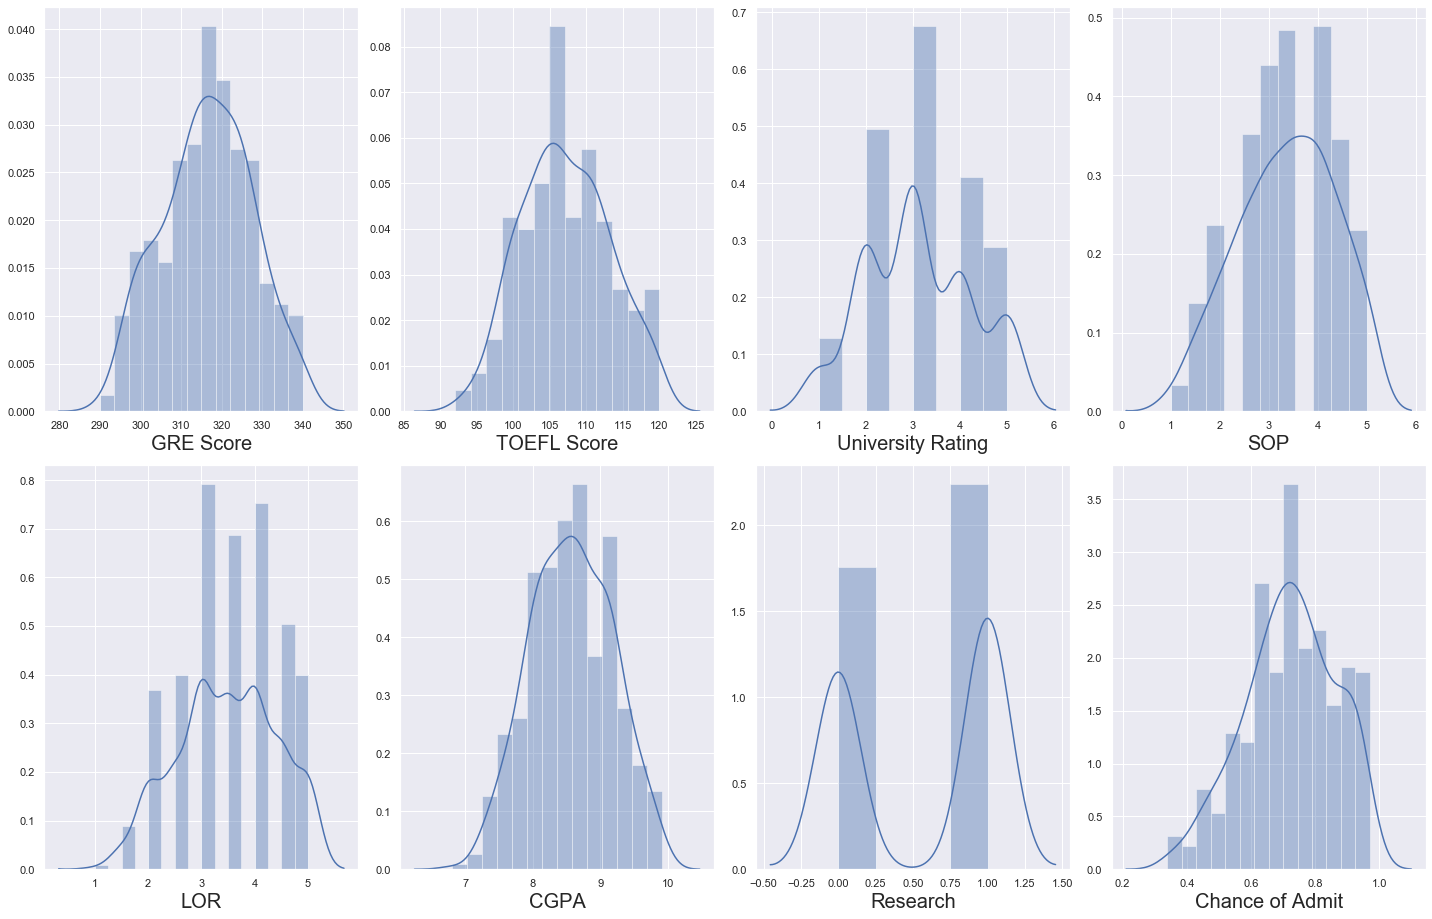

In [10]:
#plot the graph for each of the data column to see the normality of data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber =1 

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


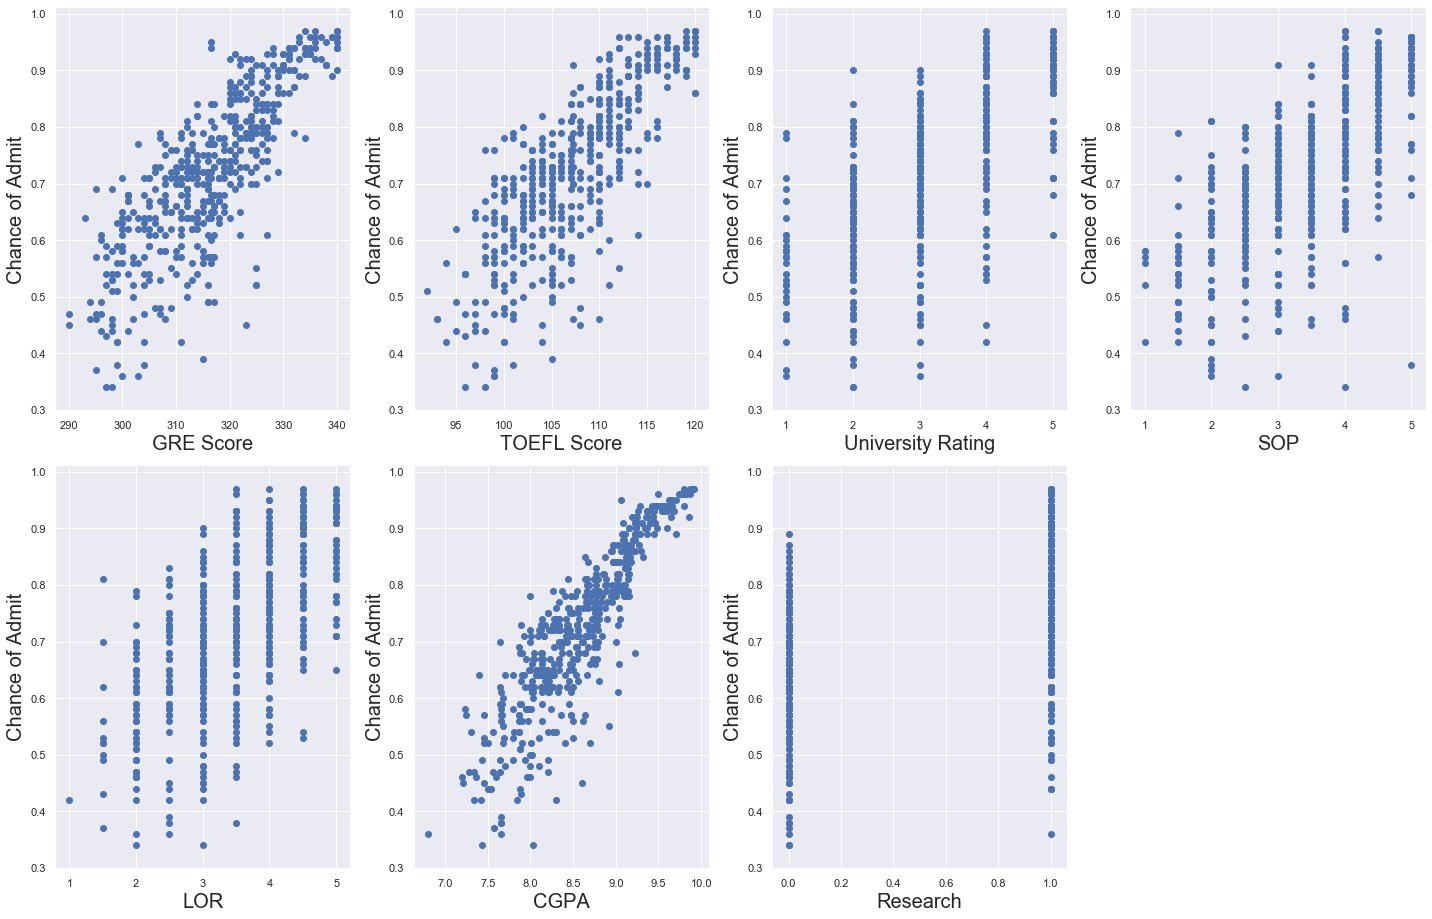

In [12]:
#distribution looks ok . Let's get x and y columns seperately
y = data['Chance of Admit']
x =data.drop(columns = ['Chance of Admit'])

#Now check the relationship between x and y columns i.e. check for linearity
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1 
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber +=1 
plt.tight_layout()

In [14]:
# data looks fairly linear . 
#Let's do multicollinearity test using VIF(Variance inflation factor)
# using scandar scalar to transform the data 
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 

Let's go ahed with splititng the data and subsequently with Linear Regression

In [20]:
#splititng the data into train and test data. split is 75% test and 25% test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=355)
# check for 75% and 25% split
print(x_train.shape[0])
print(x_test.shape[0])

375
125


In [21]:
# doing the actual modeling 
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#finding the r-square value 
regression.score(x_train,y_train)


0.8415250484247909

In [38]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [24]:
# adjusted r-squared value for test data
adj_r2(x_test,y_test)


0.7387414146174464

#### Cross Validaiton

Before we move to Regularization , let's understand Cross Validaiton.

Cross-Validation. Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Cross-validation can be used  to detect overfitting, ie, failing to generalize a pattern. Cross Validaiton can be understood by following diagram:
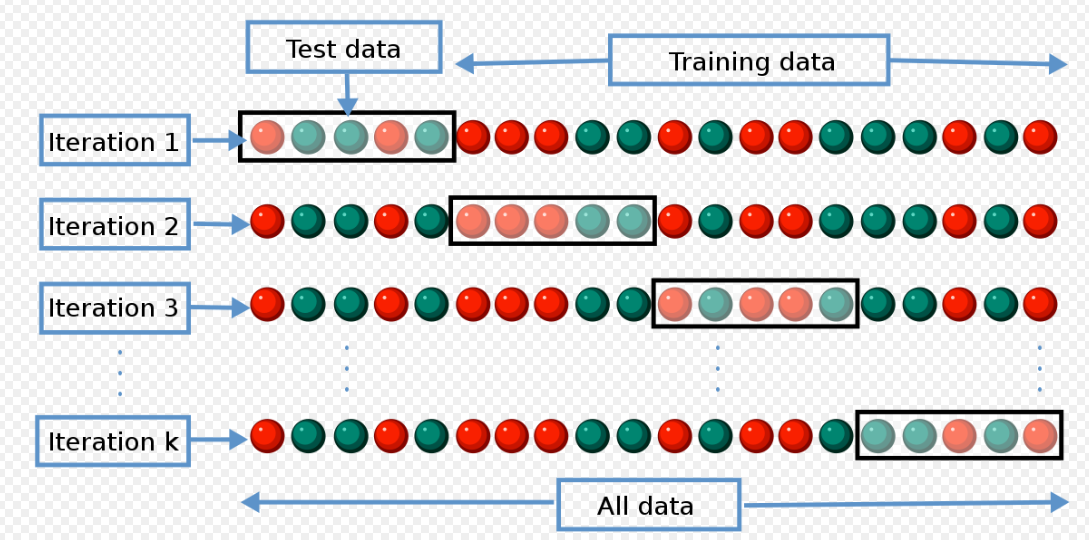



In [25]:
# Lasso Regularizaiton
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [26]:
# best alpha parameter
alpha = lasscv.alpha_
alpha


3.0341655445178153e-05

In [27]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
# accuray of test data prediction
lasso_reg.score(x_test, y_test)

0.7534654960492284

In [29]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

C:\ProgramData\Anaconda2\envs\py37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([0.20105754, 1.60791804, 1.039211  , 2.98633776, 9.98334513,
       3.0751258 , 0.72298398, 8.49249749, 1.20212604, 0.1596688 ,
       6.60901175, 6.43797868, 2.80393649, 1.35561181, 9.08281471,
       3.50075079, 9.43981987, 8.50392967, 4.21807046, 5.44763437,
       3.33377049, 5.50715425, 4.23793482, 8.98088899, 8.1994172 ,
       3.39462702, 5.96138009, 4.11131823, 6.40730251, 0.26461458,
       4.86217609, 1.80508462, 9.54953445, 2.09413474, 5.21581128,
       1.76257256, 1.02774757, 5.2926138 , 2.06577376, 1.56005502,
       4.184891  , 9.58684165, 3.74199573, 4.95954074, 0.48281834,
       1.35506507, 1.55622733, 4.43234727, 6.29103302, 6.13441363]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [30]:
ridgecv.alpha_

0.15966879881715634

In [31]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.15966879881715634, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
ridge_model.score(x_test, y_test)

0.7535679623968882

In [33]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [34]:
elasticCV.alpha_

0.0011069728449315508

In [35]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [36]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [37]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639867

From the above Regularization , we could see that there is no much improvement in accuracy and hence we can say that initial model was not over fitting .

__Let’s end the blog here. Summary of what we have learned in this blog:__
1.	Regularization - Lasso , Ridge , Elastic Net
2.  Cross Validation





### References: 	
1.	https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a
2.  https://en.wikipedia.org/wiki/Cross-validation_(statistics)#/media/File:K-fold_cross_validation_EN.svg




### Follow my blog: https://datasciencewithabhi.blogspot.com/
